In [1]:
import pandas as pd
import test_model_lib
bend_df = pd.read_csv("bend.csv")

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
models.append(('Gaussian N-Bayes', GaussianNB()))
models.append(('Support Vector Machine', SVC(gamma='auto')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=15)))
models.append(('K Nearest Neighbors', KNeighborsClassifier(n_neighbors=20)))
models.append(('Decision Tree', DecisionTreeClassifier()))

Gaussian N-Bayes


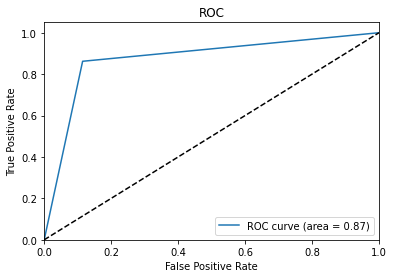

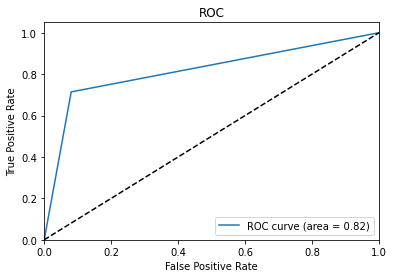

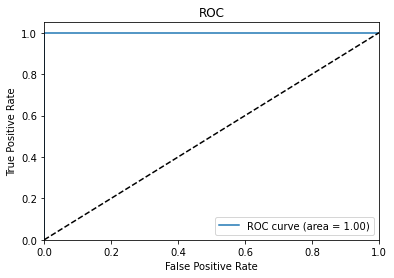

After 10 fold cross validation:
>>>Accuracy: 0.75 (+/- 0.12)
>>>Misclassification Rate: 0.25 (+/- 0.12)
>>>F1_score: 0.82 (+/- 0.11)
>>>Precision: 0.82 (+/- 0.11)
>>>Recall: 0.84 (+/- 0.13)
>>>Confusion Matrix:
[[33  6  0]
 [14 17  0]
 [ 0  0 20]]
>>>Sensitiviy: 
   Sensitivity of F = 0.7021276595744681
   Sensitivity of M = 0.7391304347826086
   Sensitivity of N = 1.0


Support Vector Machine


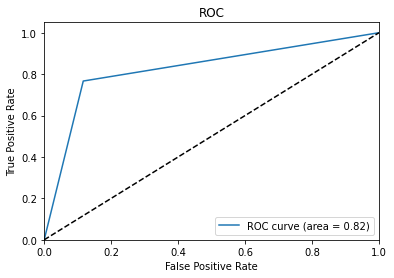

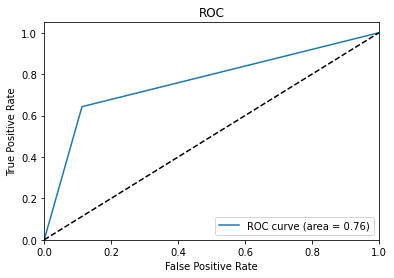

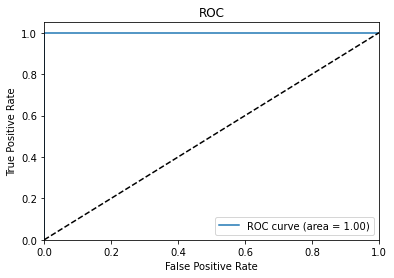

After 10 fold cross validation:
>>>Accuracy: 0.80 (+/- 0.15)
>>>Misclassification Rate: 0.20 (+/- 0.15)
>>>F1_score: 0.80 (+/- 0.14)
>>>Precision: 0.84 (+/- 0.13)
>>>Recall: 0.78 (+/- 0.16)
>>>Confusion Matrix:
[[17  9  0]
 [11 23  0]
 [ 0  0 30]]
>>>Sensitiviy: 
   Sensitivity of F = 0.6071428571428571
   Sensitivity of M = 0.71875
   Sensitivity of N = 1.0


Random Forest


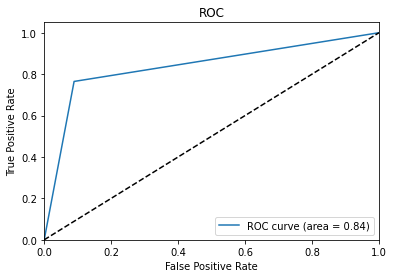

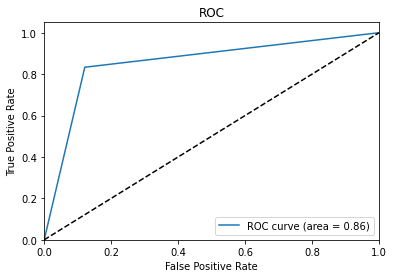

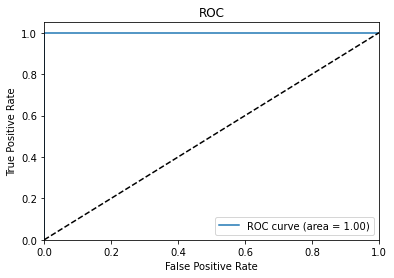

After 10 fold cross validation:
>>>Accuracy: 0.82 (+/- 0.10)
>>>Misclassification Rate: 0.18 (+/- 0.10)
>>>F1_score: 0.82 (+/- 0.12)
>>>Precision: 0.84 (+/- 0.11)
>>>Recall: 0.83 (+/- 0.14)
>>>Confusion Matrix:
[[24  8  0]
 [12 11  0]
 [ 0  0 35]]
>>>Sensitiviy: 
   Sensitivity of F = 0.6666666666666666
   Sensitivity of M = 0.5789473684210527
   Sensitivity of N = 1.0


K Nearest Neighbors


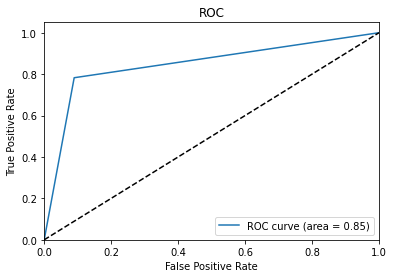

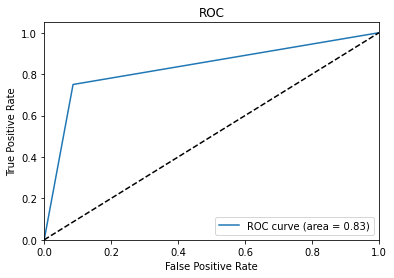

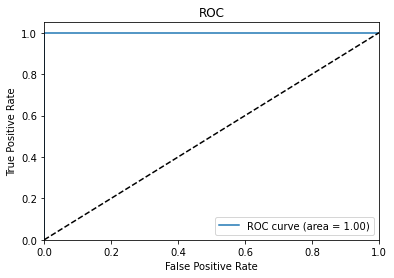

After 10 fold cross validation:
>>>Accuracy: 0.84 (+/- 0.12)
>>>Misclassification Rate: 0.16 (+/- 0.12)
>>>F1_score: 0.84 (+/- 0.12)
>>>Precision: 0.85 (+/- 0.11)
>>>Recall: 0.84 (+/- 0.13)
>>>Confusion Matrix:
[[20  6  0]
 [ 4 23  0]
 [ 0  0 37]]
>>>Sensitiviy: 
   Sensitivity of F = 0.8333333333333334
   Sensitivity of M = 0.7931034482758621
   Sensitivity of N = 1.0


Decision Tree


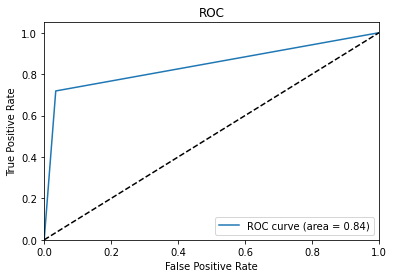

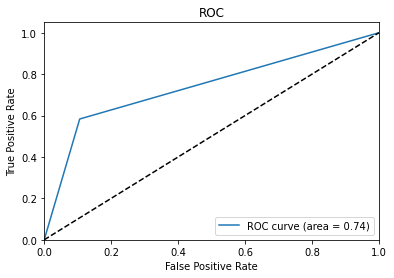

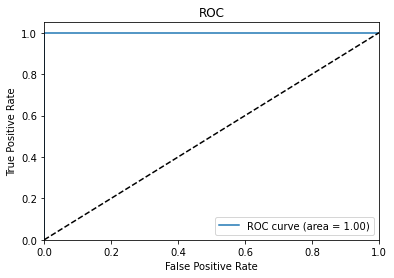

After 10 fold cross validation:
>>>Accuracy: 0.81 (+/- 0.11)
>>>Misclassification Rate: 0.19 (+/- 0.11)
>>>F1_score: 0.82 (+/- 0.12)
>>>Precision: 0.84 (+/- 0.11)
>>>Recall: 0.82 (+/- 0.15)
>>>Confusion Matrix:
[[19  8  0]
 [15 21  0]
 [ 0  0 27]]
>>>Sensitiviy: 
   Sensitivity of F = 0.5588235294117647
   Sensitivity of M = 0.7241379310344828
   Sensitivity of N = 1.0




In [3]:
for name, model in models:
    print(name)
    test_model_lib.test_model(bend_df, model, ROC = True)
#     test_model_lib.plot_ROC(model, bend_df)